<h1>Covid-19 new cases prediction with SARIMAX</h1>

<a id="1.1"></a>
<h1>Import libraries</h1>

In [1]:
!pip install geopandas
!pip install pyshp
!pip install pmdarima
!pip install ipywidgets
!pip install --force-reinstall --no-binary shapely shapely
!pip install holidays


                                              0.0/323.6 kB ? eta -:--:--
     -                                        10.2/323.6 kB ? eta -:--:--
     --------------------------             225.3/323.6 kB 2.0 MB/s eta 0:00:01
     --------------------------------       276.5/323.6 kB 2.4 MB/s eta 0:00:01
     -------------------------------------- 323.6/323.6 kB 1.8 MB/s eta 0:00:00
                                              0.0/16.2 MB ? eta -:--:--
                                              0.4/16.2 MB 12.2 MB/s eta 0:00:02
     -                                        0.6/16.2 MB 6.9 MB/s eta 0:00:03
     -                                        0.8/16.2 MB 6.0 MB/s eta 0:00:03
     -                                        0.8/16.2 MB 6.0 MB/s eta 0:00:03
     --                                       1.1/16.2 MB 4.8 MB/s eta 0:00:04
     --                                       1.1/16.2 MB 5.0 MB/s eta 0:00:03
     ---                                      1.4/16.2 MB 4.4 MB/s


[notice] A new release of pip is available: 23.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


                                              0.0/46.5 kB ? eta -:--:--
                                              0.0/46.5 kB ? eta -:--:--
     -----------------                        20.5/46.5 kB ? eta -:--:--
     ---------------------------------      41.0/46.5 kB 653.6 kB/s eta 0:00:01
     -------------------------------------- 46.5/46.5 kB 333.0 kB/s eta 0:00:00



[notice] A new release of pip is available: 23.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


                                              0.0/614.7 kB ? eta -:--:--
     ----------                             174.1/614.7 kB 5.1 MB/s eta 0:00:01
     ----------                             174.1/614.7 kB 5.1 MB/s eta 0:00:01
     ----------------------------------     553.0/614.7 kB 4.3 MB/s eta 0:00:01
     -------------------------------------- 614.7/614.7 kB 4.8 MB/s eta 0:00:00
                                              0.0/2.8 MB ? eta -:--:--
     ------                                   0.5/2.8 MB 14.2 MB/s eta 0:00:01
     --------                                 0.6/2.8 MB 6.0 MB/s eta 0:00:01
     -------------                            0.9/2.8 MB 7.5 MB/s eta 0:00:01
     -------------                            0.9/2.8 MB 7.5 MB/s eta 0:00:01
     -----------------                        1.2/2.8 MB 5.5 MB/s eta 0:00:01
     -------------------                      1.3/2.8 MB 6.1 MB/s eta 0:00:01
     -----------------------                  1.6/2.8 MB 5.2 MB/s e


[notice] A new release of pip is available: 23.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


                                              0.0/282.4 kB ? eta -:--:--
                                              0.0/282.4 kB ? eta -:--:--
     -                                        10.2/282.4 kB ? eta -:--:--
     ----                                  30.7/282.4 kB 330.3 kB/s eta 0:00:01
     -----                                 41.0/282.4 kB 245.8 kB/s eta 0:00:01
     --------                              61.4/282.4 kB 365.7 kB/s eta 0:00:01
     ----------                            81.9/282.4 kB 328.8 kB/s eta 0:00:01
     ------------                          92.2/282.4 kB 327.7 kB/s eta 0:00:01
     --------------                       112.6/282.4 kB 328.2 kB/s eta 0:00:01
     ---------------                      122.9/282.4 kB 328.4 kB/s eta 0:00:01
     ---------------                      122.9/282.4 kB 328.4 kB/s eta 0:00:01
     ----------------------               174.1/282.4 kB 361.7 kB/s eta 0:00:01
     ----------------------               174.1/282.4 kB 361

  error: subprocess-exited-with-error
  
  × Building wheel for shapely (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [147 lines of output]
      Could not find geos-config executable. Either append the path to geos-config to PATH or manually provide the include_dirs, library_dirs, libraries and other link args for compiling against a GEOS version >=3.5.
      running bdist_wheel
      running build
      running build_py
      creating build\lib.win-amd64-cpython-311\shapely
      copying shapely\affinity.py -> build\lib.win-amd64-cpython-311\shapely
      copying shapely\constructive.py -> build\lib.win-amd64-cpython-311\shapely
      copying shapely\coordinates.py -> build\lib.win-amd64-cpython-311\shapely
      copying shapely\coords.py -> build\lib.win-amd64-cpython-311\shapely
      copying shapely\creation.py -> build\lib.win-amd64-cpython-311\shapely
      copying shapely\decorators.py -> build\lib.win-amd64-cpython-311\shapely
      copying shapely\errors.p

In [210]:
import pandas as pd
import numpy as np

import seaborn as sns
import sklearn
from sklearn import metrics
from sklearn.metrics import mean_squared_error

import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

import datetime
from datetime import datetime
import calendar
import holidays

import matplotlib.dates as mdates
import math

from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose

#import pmdarima 
import pmdarima
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima import auto_arima # for determining ARIMA orders

#geopandas
import shapefile as shp
import geopandas as gpd
from pandas._libs.algos import pad

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc("axes", labelweight="bold", labelsize="large", titleweight="bold", titlesize=14, titlepad=10)

<a id="1.2"></a>
<h1>Custom functions</h1>

In [211]:
def create_features(df):
    """
    Creates time series features from date column
    df: dataframe
    """
    df = df.copy()
    df['date'] = pd.to_datetime(df['date']).dt.normalize()
    df['dayofweek'] = df['date'].dt.dayofweek
    df['month'] = df['date'].dt.month
    df['year'] = df['date'].dt.year
    df['dayofyear'] = df['date'].dt.dayofyear
    df['dayofmonth'] = df['date'].dt.day
    df['weekofyear'] = df['date'].dt.isocalendar().week
    df['dayname'] =  df['date'].dt.day_name()
    df['holiday'] = df['date'].apply(lambda x: 1 if x in holidays.Italy() else 0)
    # df = df[['dayofweek','month','year','dayofyear','dayofmonth','weekofyear','holidays']]
    df.set_index('date', inplace = True)
    return df

In [212]:
def my_plot(df, colum_name, ylabel=None, title=None, start=None, end=None, navigate = 0 ):
    """
    Python function to plot a specific column of dataframe
    Possibiliti to filter: last month, last semester,last year , ytd
    df: dataframe
    colum_name : column to plot
    ylabel:  y axis label
    title: plot title
    start: start date for the plot
    end: end date for the plot
    navigate: give the possibiliti to zoom in and out for the dates range
    """
    if start is not None or end is not None:
        df = df[start:end]

    fig = px.line(df, x=df.index, y=colum_name)


    fig.update_layout(
    title= title,
    xaxis_title= "Date",
    yaxis_title= ylabel
    # plot_bgcolor = "white"

    )   

    if navigate == 1:

        fig.update_xaxes(
        rangeslider_visible=True,
        rangeselector=dict(
        buttons=list([
          dict(count=1, label="1m", step="month", stepmode="backward"),
          dict(count=6, label="6m", step="month", stepmode="backward"),
          dict(count=1, label="YTD", step="year", stepmode="todate"),
          dict(count=1, label="1y", step="year", stepmode="backward"),
          dict(step="all")
        ])
        )
        )

    fig.update_traces(line_color='#b30000', line_width=1)

    return fig

In [213]:
# find the first and the last weekday of dataframe
def last_n_months(df,n_months):
    """
    Takes a dataframe with weekday columns and return the data from the first dayname to the last dayname
    in the dataframe n months backwards

    df: input dataframe 
    n_months: month to go backwards
    """
    # days to go backwards
    delta_days = n_months * 31 

    #last day with dayname
    last_day_name = df.loc[covid.index.max(),'dayname']
    df = df.iloc[-delta_days:].copy()

    #sort by index
    df  = df.sort_index(ascending=True)

    #filter min data with dayname
    mask = df.index.day_name().isin([last_day_name])
    min_idx = df.index[mask].min()
    #filter max data with dayname
    mask = df.index.day_name().isin([last_day_name])
    max_idx = df.index[mask].max()

    # filter dataframe
    df =  df.loc[min_idx:max_idx]

    return df

In [214]:
def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

In [215]:
def error_metrics(y_test, y_pred):
    """
    Calculate the most common forecast error metrics
    y_test: variable name y
    y_pred: variable name yhat
    """
    #R2 - coefficient of determination
    R2 = sklearn.metrics.r2_score(y_test, y_pred)
    
    #Mean squared error
    MSE = sklearn.metrics.mean_squared_error(y_test, y_pred)
    
    #Root Mean squared error
    RMSE = math.sqrt(MSE)
    
    #Mean absolute error
    MAE =  sklearn.metrics.mean_absolute_error(y_test, y_pred)
    
    #Median absolute error 
    MdAE = sklearn.metrics.median_absolute_error(y_test, y_pred)
    
    #Mean percentage error
    MAPE = sklearn.metrics.mean_absolute_percentage_error(y_test, y_pred)

    print('R2: %.3f' % R2)
    print('MSE (Mean squared error): ' f"{MSE:,.0f}")
    print('RMSE (Root mean squared error): ' f"{RMSE:,.0f}")
    print('MAE (Mean absolute error): ' f"{MAE:,.0f}")
    print('MdAE (Median absolute error ): ' f"{MdAE:,.0f}")
    print('MAPE (Mean percentage error): ' f"{MAPE:,.2%}")
   
    return

<a id="1.3"></a>
<h1>Load the data</h1>

<ul>
<li><span>Load the official data</span></li>
<li><span>Data updated COVID-19 Italy: Weekly - In this dashboard we Load Data on Monday</span></li>
</ul>

In [216]:
#import data
df = pd.read_csv('https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-regioni/dpc-covid19-ita-regioni.csv', parse_dates=['data'])
covid = df[['data','nuovi_positivi','terapia_intensiva','totale_ospedalizzati','ricoverati_con_sintomi','deceduti','totale_casi','tamponi','denominazione_regione','lat','long']].copy()

#remame columns and select only new_cases, region and date
covid.rename(columns={'nuovi_positivi': 'new_cases', 'denominazione_regione': 'region','data':'date'}, inplace= True)
#check nulls
covid.isnull().sum()

date                      0
new_cases                 0
terapia_intensiva         0
totale_ospedalizzati      0
ricoverati_con_sintomi    0
deceduti                  0
totale_casi               0
tamponi                   0
region                    0
lat                       0
long                      0
dtype: int64

<span>There are no missing values</span>

In [217]:
covid

,date,new_cases,terapia_intensiva,totale_ospedalizzati,ricoverati_con_sintomi,deceduti,totale_casi,tamponi,region,lat,long
0,2020-02-24 18:00:00,0,0,0,0,0,0,5,Abruzzo,42.351222,13.398438
1,2020-02-24 18:00:00,0,0,0,0,0,0,0,Basilicata,40.639471,15.805148
2,2020-02-24 18:00:00,0,0,0,0,0,0,1,Calabria,38.905976,16.594402
3,2020-02-24 18:00:00,0,0,0,0,0,0,10,Campania,40.839566,14.250850
4,2020-02-24 18:00:00,18,2,12,10,0,18,148,Emilia-Romagna,44.494367,11.341721
...,...,...,...,...,...,...,...,...,...,...,...
35779,2024-10-23 17:00:00,1,3,96,93,13134,1836797,16985955,Sicilia,38.115697,13.362357
35780,2024-10-23 17:00:00,82,4,205,201,12664,1667032,17536500,Toscana,43.769231,11.255889
35781,2024-10-23 17:00:00,3,2,54,52,2537,462434,5208294,Umbria,43.106758,12.388247
35782,2024-10-23 17:00:00,3,0,0,0,592,52760,612450,Valle d'Aosta,45.737503,7.320149


In [218]:
#select features
covid_endo = covid[['date','new_cases', 'lat','long']].copy()
covid = covid[['date','new_cases', 'region']].copy()

#check the last date for data
updated_to = covid.date.max()
#cast to string
updated_to = datetime.strftime(updated_to, '%Y-%m-%d') 
#msg
date_to = 'The data is updated to ' + updated_to

#print
box_char = '='
print(box_char*(len(date_to)+4))
print(box_char,date_to,box_char)
print(box_char*(len(date_to)+4))

= The data is updated to 2024-10-23 =


In [219]:
covid_endo

,date,new_cases,lat,long
0,2020-02-24 18:00:00,0,42.351222,13.398438
1,2020-02-24 18:00:00,0,40.639471,15.805148
2,2020-02-24 18:00:00,0,38.905976,16.594402
3,2020-02-24 18:00:00,0,40.839566,14.250850
4,2020-02-24 18:00:00,18,44.494367,11.341721
...,...,...,...,...
35779,2024-10-23 17:00:00,1,38.115697,13.362357
35780,2024-10-23 17:00:00,82,43.769231,11.255889
35781,2024-10-23 17:00:00,3,43.106758,12.388247
35782,2024-10-23 17:00:00,3,45.737503,7.320149


<a id="2.1"></a>
<h1>Data preparation</h1>

In [220]:
#preapare data for region analysis
covid_reg = covid.groupby(['date','region'], as_index = False)['new_cases'].sum().copy()

In [221]:
#preapare data for eda and forecast
covid = covid.groupby('date', as_index = False)['new_cases'].sum().copy()
#create features (see custom functions above)
covid = create_features(covid)

In [222]:
#visualize
covid.head(5)
print(covid)

            new_cases  dayofweek  month  year  dayofyear  dayofmonth  \
date                                                                   
2020-02-24        221          0      2  2020         55          24   
2020-02-25         93          1      2  2020         56          25   
2020-02-26         78          2      2  2020         57          26   
2020-02-27        250          3      2  2020         58          27   
2020-02-28        238          4      2  2020         59          28   
...               ...        ...    ...   ...        ...         ...   
2024-10-19       1327          5     10  2024        293          19   
2024-10-20        742          6     10  2024        294          20   
2024-10-21        428          0     10  2024        295          21   
2024-10-22       1843          1     10  2024        296          22   
2024-10-23       1278          2     10  2024        297          23   

            weekofyear    dayname  holiday  
date              

<a id="2.4"></a>
<h1>Exploratory data analysis</h1>

In [223]:
# plot new_cases with navigation slice
fig = my_plot(covid, 'new_cases',ylabel = "new cases",title="Covid 19 Italy New Cases", navigate = 1)
fig.show()

In [224]:
#last three months
df_three_months = last_n_months(covid,3)

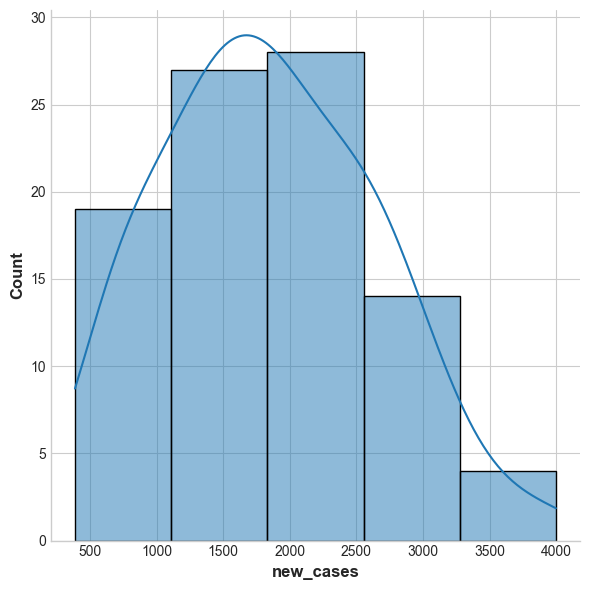

In [225]:
#distribution plot
sns.displot(df_three_months['new_cases'],bins=5,kde=True,height = 6)
plt.show()

# New cases last month 

In [226]:
#last month
df_last_month = last_n_months(covid,1)

In [227]:
# visualize last month of data
cm = sns.light_palette("#b30000", as_cmap=True)
 
# Visualizing the DataFrame with set precision

df_last_month[['new_cases','dayname']].style.background_gradient(cmap=cm)



,new_cases,dayname
date,,
2024-09-25 00:00:00,2198,Wednesday
2024-09-26 00:00:00,2168,Thursday
2024-09-27 00:00:00,1917,Friday
2024-09-28 00:00:00,1876,Saturday
2024-09-29 00:00:00,1300,Sunday
2024-09-30 00:00:00,645,Monday
2024-10-01 00:00:00,3070,Tuesday
2024-10-02 00:00:00,2097,Wednesday
2024-10-03 00:00:00,2073,Thursday


<a id="3"></a>
<h1>Build SarimaX Model</h1>

<a id="3.1"></a>
<h1>Data preparation for SarimaX</h1>

In [228]:
covid = covid[['new_cases', 'holiday']]
covid.index.freq = 'D'

In [229]:
steps = 7
train = covid.iloc[:-steps]
test = covid.iloc[len(train):]

In [230]:
endog = train[['new_cases']]
covid_ex = covid[['holiday']]
exog = pd.get_dummies(covid_ex)
train_exog = exog.iloc[:-steps]

<a id="3.3"></a>
<h1>Find optimal hyperparameters</h1>

In [231]:
stepwise_fit = auto_arima(endog, seasonal = True,trace = True, m= 7,exogenous=train_exog, maxiter  = 100) 

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[7] intercept   : AIC=34533.524, Time=4.29 sec
 ARIMA(0,1,0)(0,0,0)[7] intercept   : AIC=36797.578, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[7] intercept   : AIC=34830.150, Time=1.10 sec
 ARIMA(0,1,1)(0,0,1)[7] intercept   : AIC=35260.016, Time=0.75 sec
 ARIMA(0,1,0)(0,0,0)[7]             : AIC=36795.579, Time=0.02 sec
 ARIMA(2,1,2)(0,0,1)[7] intercept   : AIC=35279.775, Time=0.67 sec
 ARIMA(2,1,2)(1,0,0)[7] intercept   : AIC=34773.564, Time=1.37 sec
 ARIMA(2,1,2)(2,0,1)[7] intercept   : AIC=34527.937, Time=8.64 sec
 ARIMA(2,1,2)(2,0,0)[7] intercept   : AIC=34447.986, Time=4.73 sec
 ARIMA(1,1,2)(2,0,0)[7] intercept   : AIC=inf, Time=2.88 sec
 ARIMA(2,1,1)(2,0,0)[7] intercept   : AIC=34526.301, Time=3.05 sec
 ARIMA(3,1,2)(2,0,0)[7] intercept   : AIC=34449.440, Time=5.98 sec
 ARIMA(2,1,3)(2,0,0)[7] intercept   : AIC=inf, Time=8.33 sec
 ARIMA(1,1,1)(2,0,0)[7] intercept   : AIC=34546.796, Time=2.14 sec
 ARIMA(1,1,3)(2,0,0)[7] interce

<a id="4"></a>
<h1>Predict and Evaluate the model</h1>

In [232]:
#prepare forecast
start_index = len(train) 

#forecast N steps
end_index = start_index + steps 

#exogenous features 
exog_forecast =  exog.iloc[start_index-1:end_index-1] 

<a id="4.1"></a>
<h1>Predict</h1>

In [233]:
# dataframe test = last seven days
test = covid[['new_cases']].iloc[start_index:]
predictions = pd.DataFrame(stepwise_fit.predict(exogenous=exog_forecast, n_periods = steps), index=test.index)

# Actual vs Predicted

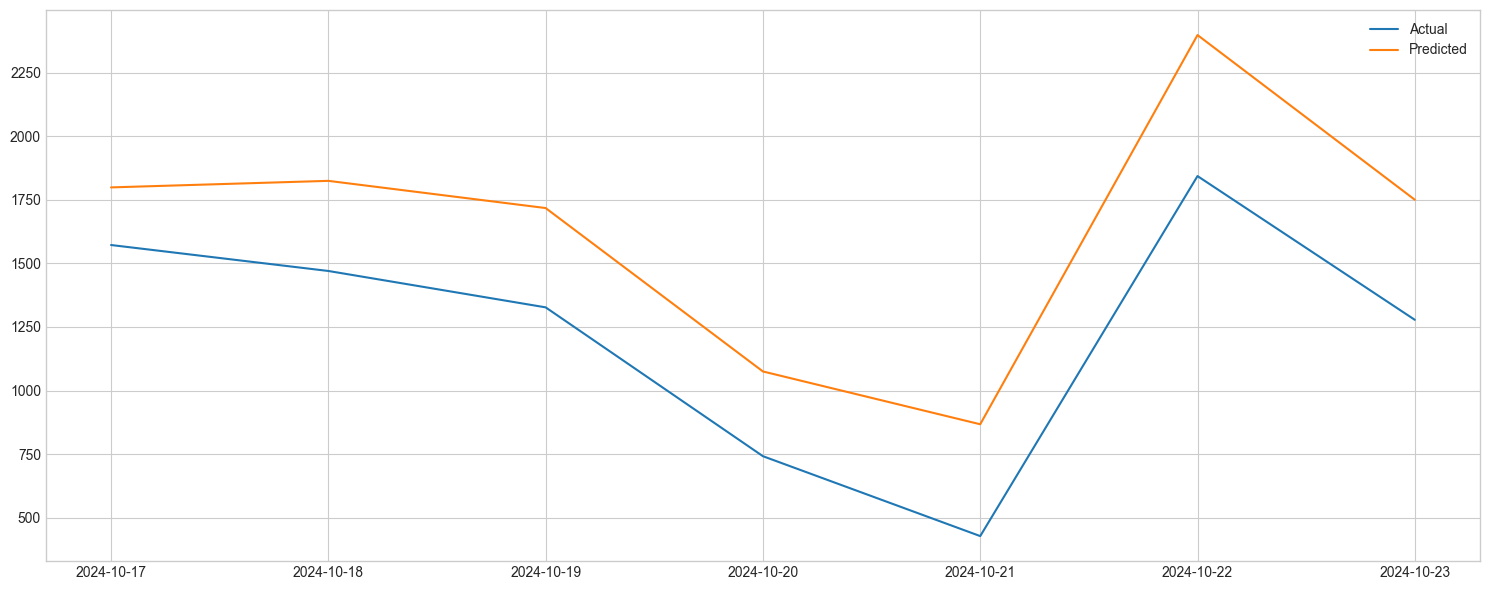

In [234]:
# actual vs predicted

plt.rcParams["figure.figsize"] = [15, 6]
ax = plt.gca()

plt.plot(test['new_cases'], label='Actual')
plt.plot(predictions, label='Predicted')
plt.legend()
plt.savefig("graph1.png")
plt.show()

<a id="4.2"></a>
<h1>Evaluate the model</h1>

In [235]:
# error metrics
error_metrics(test['new_cases'], predictions)

R2: 0.194
MSE (Mean squared error): 166,163
RMSE (Root mean squared error): 408
MAE (Mean absolute error): 396
MdAE (Median absolute error ): 390
MAPE (Mean percentage error): 40.36%


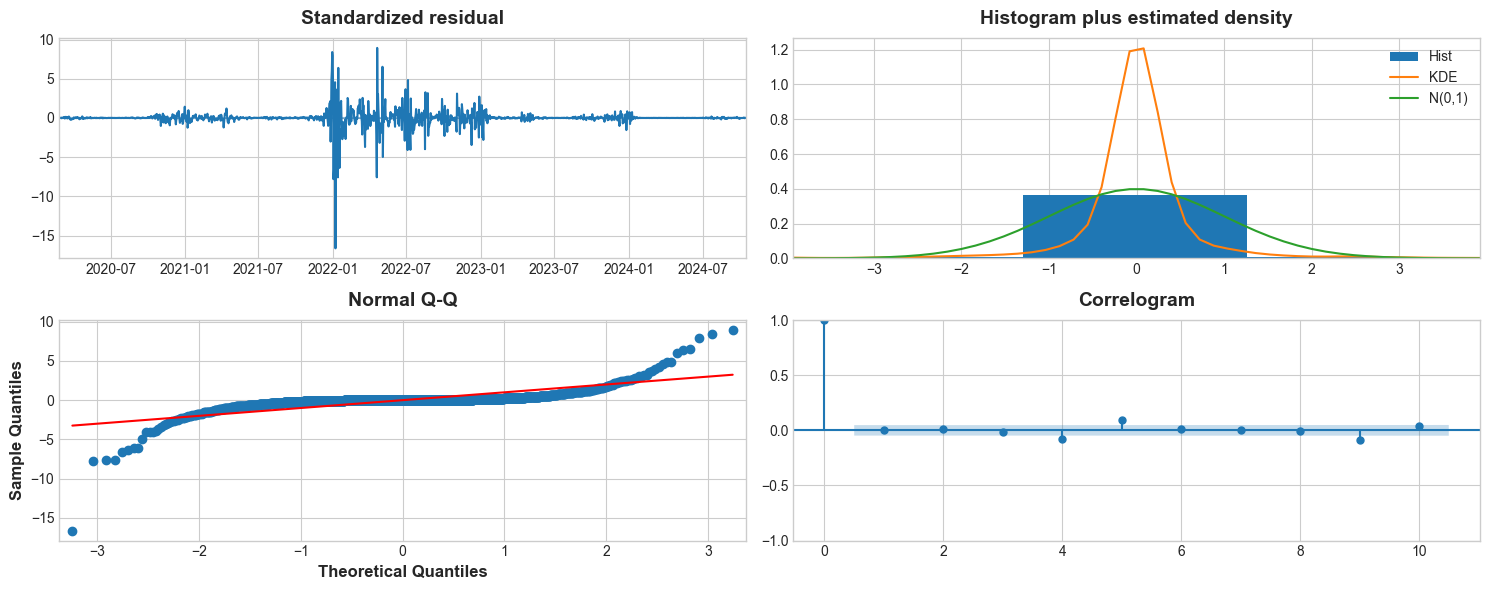

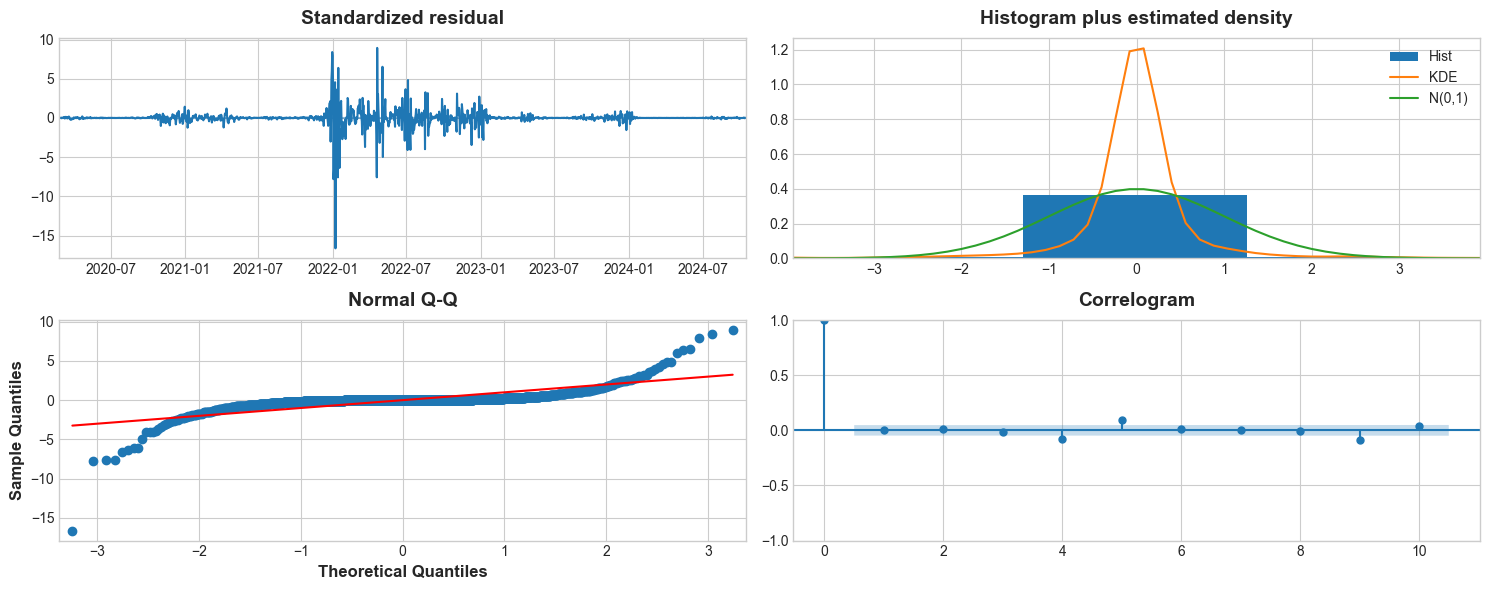

In [236]:
# model diagnostic
stepwise_fit.plot_diagnostics()

Data preparation for endogeneous variables

In [237]:
covid_endo

,date,new_cases,lat,long
0,2020-02-24 18:00:00,0,42.351222,13.398438
1,2020-02-24 18:00:00,0,40.639471,15.805148
2,2020-02-24 18:00:00,0,38.905976,16.594402
3,2020-02-24 18:00:00,0,40.839566,14.250850
4,2020-02-24 18:00:00,18,44.494367,11.341721
...,...,...,...,...
35779,2024-10-23 17:00:00,1,38.115697,13.362357
35780,2024-10-23 17:00:00,82,43.769231,11.255889
35781,2024-10-23 17:00:00,3,43.106758,12.388247
35782,2024-10-23 17:00:00,3,45.737503,7.320149


In [238]:
print(covid_endo)

                     date  new_cases        lat       long
0     2020-02-24 18:00:00          0  42.351222  13.398438
1     2020-02-24 18:00:00          0  40.639471  15.805148
2     2020-02-24 18:00:00          0  38.905976  16.594402
3     2020-02-24 18:00:00          0  40.839566  14.250850
4     2020-02-24 18:00:00         18  44.494367  11.341721
...                   ...        ...        ...        ...
35779 2024-10-23 17:00:00          1  38.115697  13.362357
35780 2024-10-23 17:00:00         82  43.769231  11.255889
35781 2024-10-23 17:00:00          3  43.106758  12.388247
35782 2024-10-23 17:00:00          3  45.737503   7.320149
35783 2024-10-23 17:00:00        182  45.434905  12.338452

[35784 rows x 4 columns]


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=36237.987, Time=0.69 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=36797.578, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=36537.334, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=36267.442, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=36795.579, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=36146.822, Time=0.61 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=36256.651, Time=0.19 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=36259.884, Time=0.15 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=36168.777, Time=0.47 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=36146.985, Time=0.47 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=36247.372, Time=0.19 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=36057.989, Time=1.65 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=36043.082, Time=0.94 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=35788.426, Time=0.92 sec
 ARIMA(3,1,1)(0,0,0

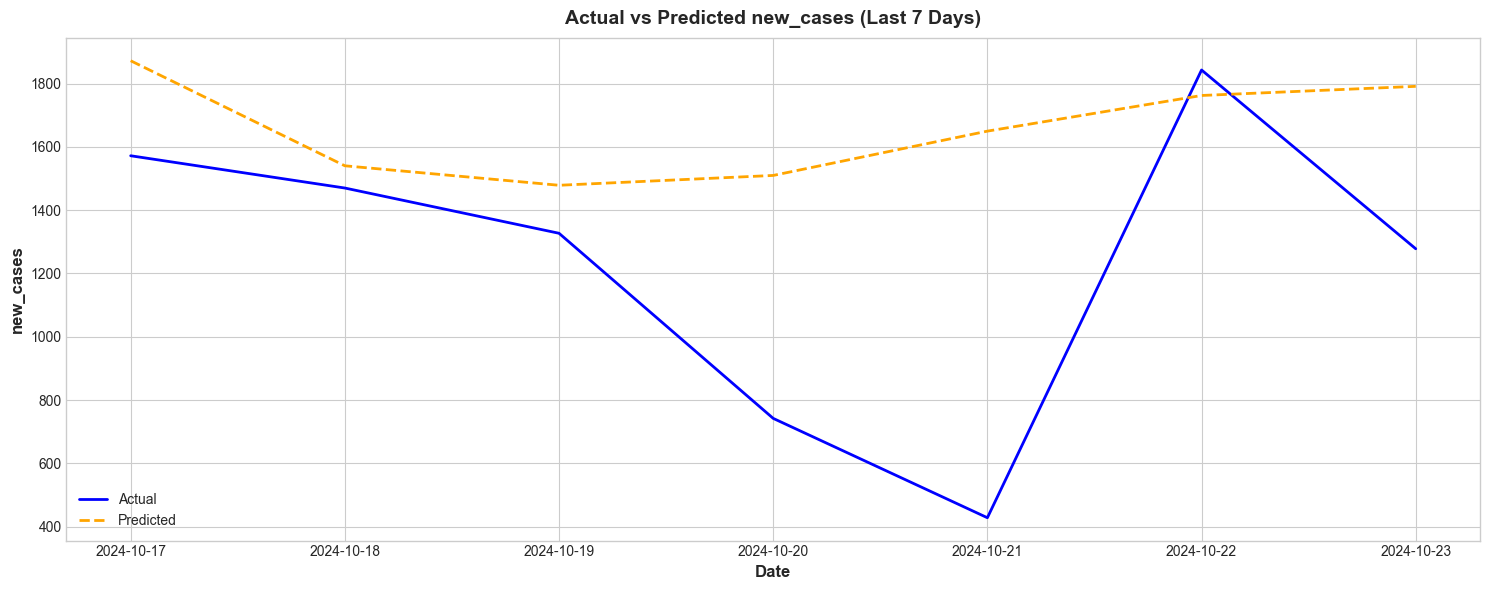

In [239]:
import pandas as pd
from pmdarima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# Preprocessing: Set 'date' as index and aggregate 'new_cases' by date
df = covid_endo.copy()
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)
df_daily = df['new_cases'].resample('D').sum()

# Define the last seven days as the test set
test = df_daily[-7:]
train = df_daily[:-7]

# Automatically select ARIMA parameters
model = auto_arima(train, seasonal=False, trace=True, error_action="ignore", suppress_warnings=True, stepwise=True)

# Fit the model
model.fit(train)

# Forecast for the test period
steps = len(test)
predictions = pd.DataFrame(model.predict(n_periods=steps), index=test.index, columns=['Predicted'])

# Evaluate model performance
mse = mean_squared_error(test, predictions)
mae = mean_absolute_error(test, predictions)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")

# Plot actual vs predicted
plt.rcParams["figure.figsize"] = [15, 6]
plt.plot(test, label='Actual', color='blue', linewidth=2)
plt.plot(predictions, label='Predicted', color='orange', linestyle='--', linewidth=2)
plt.legend()
plt.title("Actual vs Predicted new_cases (Last 7 Days)")
plt.xlabel("Date")
plt.ylabel("new_cases")
plt.savefig("graph2.png")
plt.show()


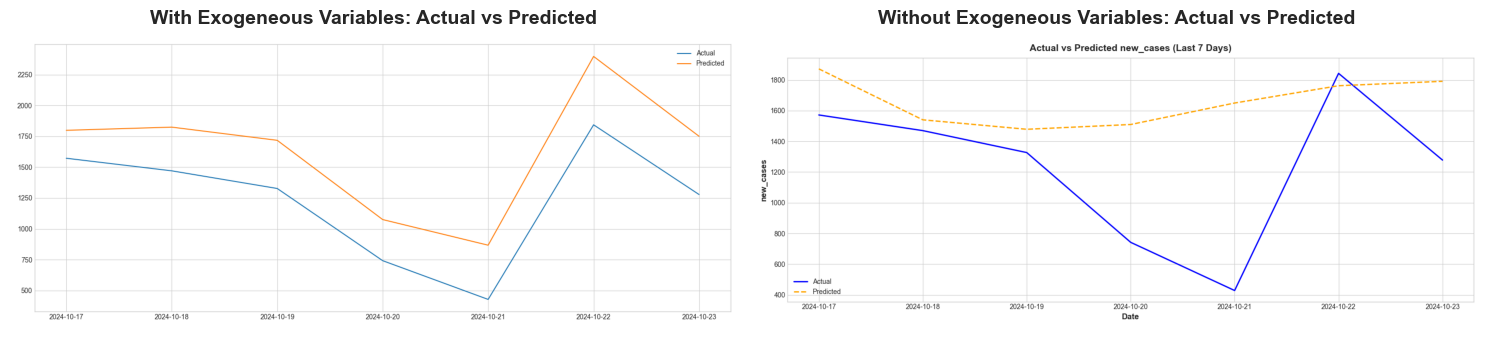

In [241]:
from PIL import Image
import matplotlib.pyplot as plt

# Load and display both images side by side
img1 = Image.open("graph1.png")
img2 = Image.open("graph2.png")

# Display side by side
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
axes[0].imshow(img1)
axes[0].axis("off")
axes[0].set_title("With Exogeneous Variables: Actual vs Predicted")

axes[1].imshow(img2)
axes[1].axis("off")
axes[1].set_title("Without Exogeneous Variables: Actual vs Predicted")

plt.show()


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1557.235, Time=1.12 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1595.294, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1583.315, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1576.094, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1593.295, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1557.571, Time=0.22 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1557.587, Time=0.13 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=1561.587, Time=0.23 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=1561.571, Time=0.33 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1555.730, Time=0.08 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1566.211, Time=0.05 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1575.701, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=1553.730, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=1574.099, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0]          

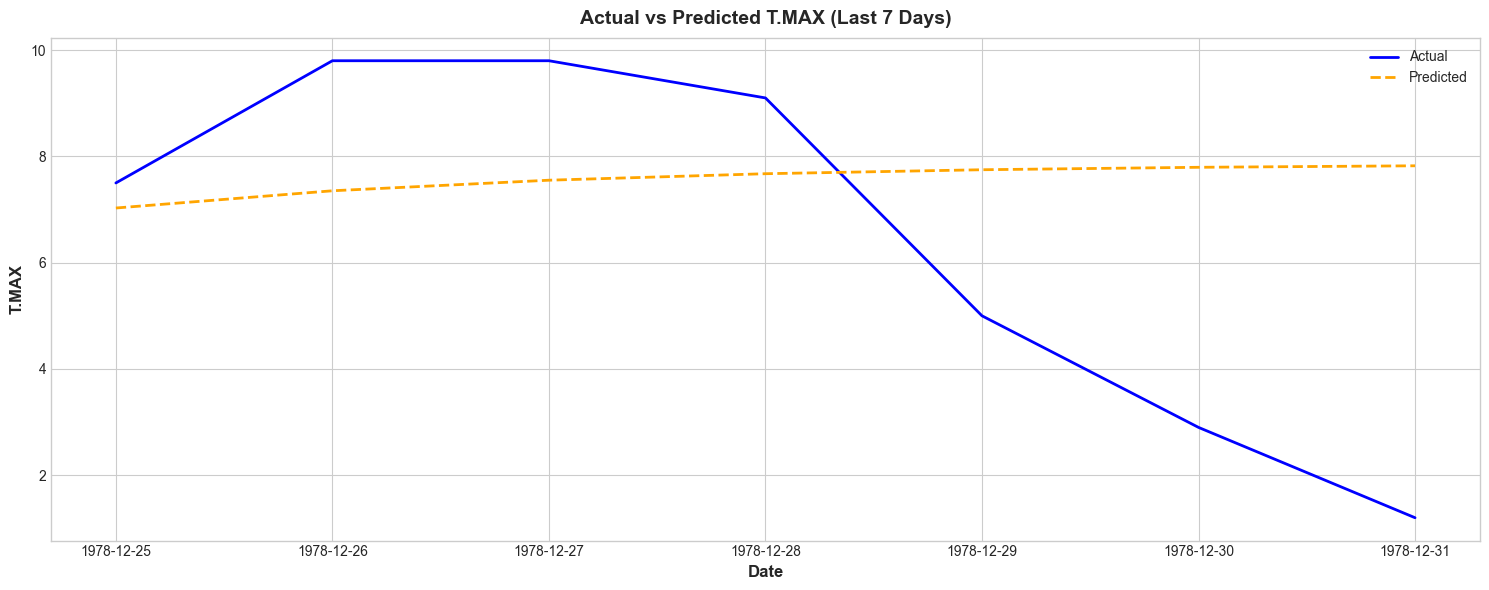

In [254]:
import pandas as pd
from pmdarima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# Load dataset and filter dates from 1978 onwards
df = pd.read_csv('wind_dataset.csv')
df = df[df['DATE'] >= '1978-01-01']

# Fill missing values in specified columns with their mean
df['T.MAX'] = df['T.MAX'].fillna(df['T.MAX'].mean())
df['T.MIN.G'] = df['T.MIN.G'].fillna(df['T.MIN.G'].mean())
df['RAIN'] = df['RAIN'].fillna(df['RAIN'].mean())
df['WIND'] = df['WIND'].fillna(df['WIND'].mean())
df['T.MIN'] = df['T.MIN'].fillna(df['T.MIN'].mean())

# Select relevant columns and set DATE as the index
data = df[['WIND', 'RAIN', 'T.MAX', 'T.MIN', 'T.MIN.G']]
data['DATE'] = pd.to_datetime(df['DATE'])  # Convert DATE to datetime
data.set_index('DATE', inplace=True)

# Define the last 7 days as the test set for 'T.MAX' forecasting
target_column = 'T.MAX'
test = data[[target_column]].iloc[-7:]
train = data[[target_column]].iloc[:-7]

# Automatically select ARIMA parameters
model = auto_arima(train, seasonal=False, trace=True, error_action="ignore", suppress_warnings=True, stepwise=True)

# Fit the model
model.fit(train)

# Forecast for the test period
steps = len(test)
predictions = pd.DataFrame(model.predict(n_periods=steps), index=test.index, columns=['Predicted'])

# Evaluate model performance
mse = mean_squared_error(test, predictions)
mae = mean_absolute_error(test, predictions)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")

# Plot actual vs predicted
plt.rcParams["figure.figsize"] = [15, 6]
plt.plot(test, label='Actual', color='blue', linewidth=2)
plt.plot(predictions, label='Predicted', color='orange', linestyle='--', linewidth=2)
plt.legend()
plt.title("Actual vs Predicted T.MAX (Last 7 Days)")
plt.xlabel("Date")
plt.ylabel("T.MAX")
plt.show()


In [261]:
import pandas as pd
import itertools
from pmdarima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# Load dataset and filter dates from 1978 onwards
df = pd.read_csv('wind_dataset.csv')
df = df[df['DATE'] >= '1978-01-01']

# Fill missing values in specified columns with their mean
df['T.MAX'] = df['T.MAX'].fillna(df['T.MAX'].mean())
df['T.MIN.G'] = df['T.MIN.G'].fillna(df['T.MIN.G'].mean())
df['RAIN'] = df['RAIN'].fillna(df['RAIN'].mean())
df['WIND'] = df['WIND'].fillna(df['WIND'].mean())
df['T.MIN'] = df['T.MIN'].fillna(df['T.MIN'].mean())

# Set DATE as the index after converting it to datetime
df['DATE'] = pd.to_datetime(df['DATE'])
df.set_index('DATE', inplace=True)

# Define target variable and feature columns
target_column = 'WIND'
feature_columns = ['T.MAX', 'RAIN', 'T.MIN', 'T.MIN.G']

# Initialize a list to store results
results = []

# Loop over all combinations of feature columns
for i in range(1, len(feature_columns) + 1):
    for combination in itertools.combinations(feature_columns, i):
        # Define the dataset with the selected combination
        data = df[list(combination) + [target_column]]
        
        # Split data into train and test sets
        test = data[[target_column]].iloc[-7:]
        train = data[[target_column]].iloc[:-7]
        train_exog = data[list(combination)].iloc[:-7]
        test_exog = data[list(combination)].iloc[-7:]

        
        print(train_exog,test_exog)
        print("****")
        
        # Fit ARIMA model
        model = auto_arima(train, exogenous=train_exog, seasonal=False, trace=False, error_action="ignore", suppress_warnings=True, stepwise=True)
        model.fit(train, exogenous=train_exog)

        # Forecast for the test period
        steps = len(test)
        predictions = pd.DataFrame(model.predict(n_periods=steps, exogenous=test_exog), index=test.index, columns=['Predicted'])

        # Calculate MSE and MAE
        mse = mean_squared_error(test, predictions)
        mae = mean_absolute_error(test, predictions)

        # Store the results
        results.append({
            'Combination': combination,
            'MSE': mse,
            'MAE': mae
        })

        # Display performance for each combination
        print(f"Combination: {combination}")
        print(f"Mean Squared Error: {mse}")
        print(f"Mean Absolute Error: {mae}")
        print('-' * 50)

# Optionally, you could convert results to a DataFrame for easier sorting and viewing
results_df = pd.DataFrame(results)
print(results_df.sort_values(by='MSE').reset_index(drop=True))


            T.MAX
DATE             
1978-01-01    8.3
1978-01-02    9.1
1978-01-03    5.7
1978-01-04    8.9
1978-01-05    9.4
...           ...
1978-12-20    5.0
1978-12-21    5.2
1978-12-22    6.4
1978-12-23    6.4
1978-12-24    6.5

[358 rows x 1 columns]             T.MAX
DATE             
1978-12-25    7.5
1978-12-26    9.8
1978-12-27    9.8
1978-12-28    9.1
1978-12-29    5.0
1978-12-30    2.9
1978-12-31    1.2
****
Combination: ('T.MAX',)
Mean Squared Error: 45.39346738371597
Mean Absolute Error: 6.225767535694251
--------------------------------------------------
            RAIN
DATE            
1978-01-01   1.4
1978-01-02   6.6
1978-01-03  11.3
1978-01-04   1.9
1978-01-05   0.0
...          ...
1978-12-20  12.6
1978-12-21   4.2
1978-12-22   1.9
1978-12-23  28.2
1978-12-24   4.9

[358 rows x 1 columns]             RAIN
DATE            
1978-12-25   8.5
1978-12-26   9.0
1978-12-27  16.8
1978-12-28  16.0
1978-12-29  14.7
1978-12-30   4.9
1978-12-31   0.5
****
Combination: ('RAIN'